# t-SNE

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
df = pd.read_csv("data/wine.data")

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
X, y = df.iloc[:,1:].values, df.iloc[:,0].values

std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
# X_test_std = std_scaler.transform(X_test)

df_std = pd.DataFrame(X_std, columns=df.columns[1:])

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

c:\Users\WHK\anaconda3\envs\datascience\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\WHK\anaconda3\envs\datascience\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.000s...
[t-SNE] Computed neighbors for 177 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 1.846523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.236641
[t-SNE] KL divergence after 300 iterations: 0.323483


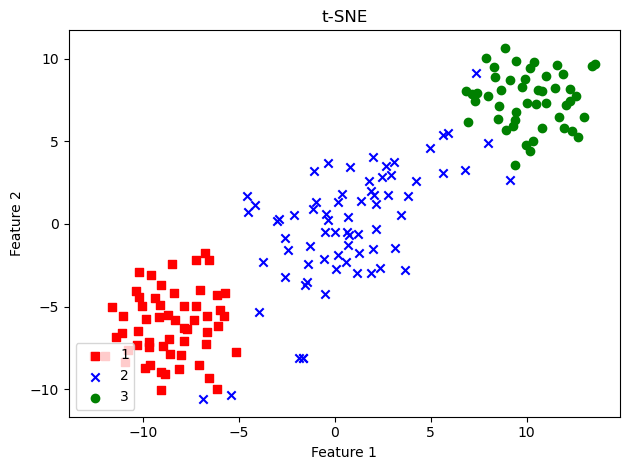

In [ ]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(tsne_results[y == l, 0], 
                tsne_results[y == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='lower left')
plt.title("t-SNE")
plt.tight_layout()
plt.show()